# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
# Primeiro vamos importar as bibliotecas para trabalhar com os dados

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight

In [2]:
# Agora vamos carregar a base de dados que construímos na tarefa passada

df = pd.read_csv('df_preparado.csv')

In [35]:
# Para nossa segurança, vamos criar uma cópia do DataFrame acima para que, se errarmos algo, possamos retornar e re-
# cuperar os dados

df1 = df.copy()

# Vamos exibir na tela a coṕia do DataFrame com os primeiros cinco dados, para simples verificação:

df1.head(5)

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,True,...,False,False,True,False,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,False,...,True,False,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False


In [36]:
# Mudamos o tipo de variável da feature "mau" para inteiro para que possamos construir a Árvore de Decisão:

df1.mau = df1.mau.astype(int)

In [37]:
# Conferindo o DataFrame com a mudança do tipo de variável:

df1.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_F,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,False,...,True,False,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,0,True,...,False,False,True,False,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,0,True,...,False,False,True,False,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,0,False,...,True,False,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,0,True,...,True,False,False,False,False,True,False,False,False,False


In [38]:
# Conferindo também os tipos das variáveis de nosso DataFrame:

df1.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_F                                       bool
sexo_M                                       bool
posse_de_veiculo_N                           bool
posse_de_veiculo_Y                           bool
posse_de_imovel_N                            bool
posse_de_imovel_Y                            bool
tipo_renda_Commercial associate              bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool


In [39]:
# Separamos a variável target das varáveis explicativas, no caso esta é a variável target:

y = df1.mau

In [40]:
# Conferindo a variável target:

y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [41]:
# Separando as variáveis explicativas da variável target:

X = df1.drop('mau', axis = 1)

In [42]:
# Conferindo as variáveis explicativas:

X

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_F,sexo_M,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,True,False,...,False,False,True,False,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,True,False,...,False,False,True,False,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,False,False,False,False,False,True,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,False,True,...,True,False,False,False,False,True,False,False,False,False


In [75]:
# Neste código, separamos 30% dos dados para teste e 70% para treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [76]:
# Treinamos a nossa Árvore de Decisão com a proporção de 70% para as variáveis explicativas e target para treino:

clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(random_state=100)

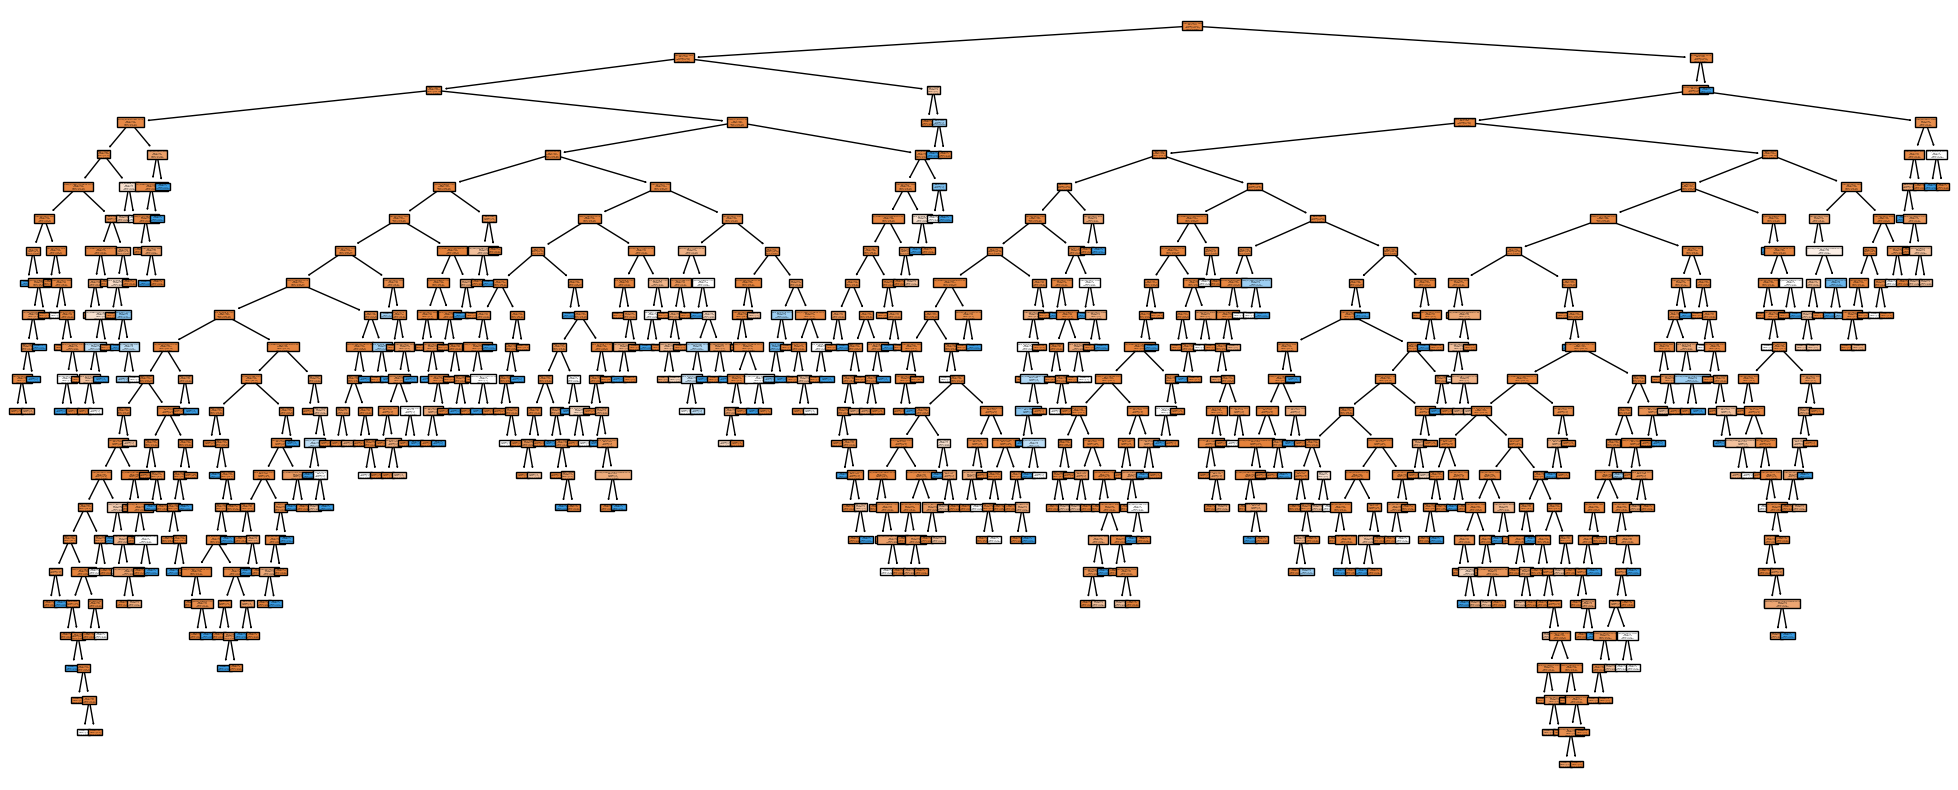

In [78]:
# Nossa Árvore de Decisão construída com os parâmetros de treino:

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled = True,
          class_names = ['Aprovado', 'Reprovado'],
          feature_names = list(X.columns))

In [79]:
# Aqui vamos pedir para gerar as predições conforme os dados de treino que separamos acima:

y_pred = clf.predict(X_train)

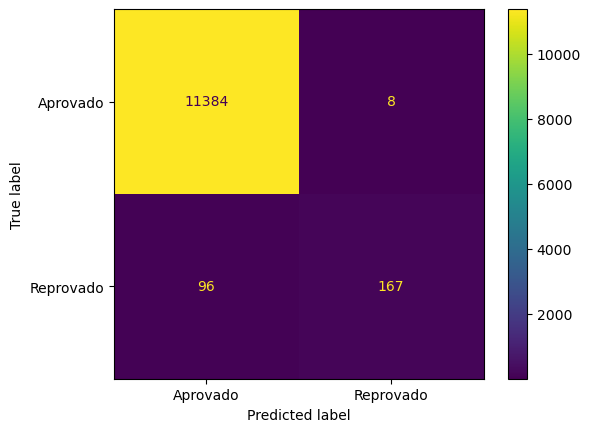

In [80]:
# Vamos criar a matriz de confusão:

cm = confusion_matrix(y_train, y_pred)

# Vamos exibir a matriz de confusão com os rótulos personalizados:

MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Aprovado", "Reprovado"])
MatrizDeConfusao.plot()
plt.show()

In [81]:
# Com o código abaixo, podemos calcular a acurária de nosso modelo:

acuracia = accuracy_score(y_train, y_pred)
print("Acurácia no treinamento:", acuracia)

Acurácia no treinamento: 0.991076791076791


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [82]:
# Como já treinamos o nosso modelo, podemos fazer as previsões em nossa base de teste com o seguinte código:

y_pred_test = clf.predict(X_test)

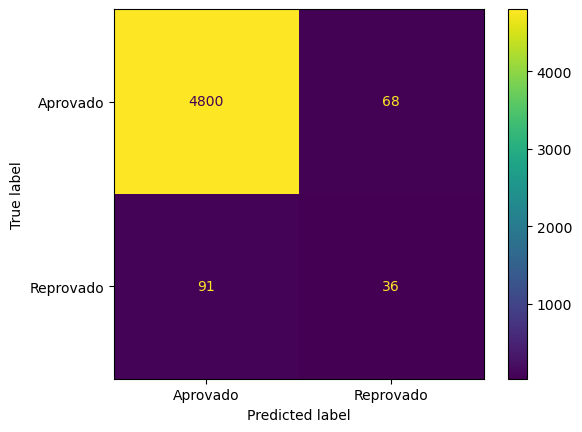

In [83]:
# Criamos a matriz de confusão usando os dados que separamos para teste e comparamos com aqueles que foram preditos
# pelo nosso modelo:
cm_test = confusion_matrix(y_test, y_pred_test)

# Exibimos a matriz de confusão com o código abaixo, com os rótulos personalizados:
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix = cm_test, 
                                          display_labels = ["Aprovado", "Reprovado"])
# Plotamos a nossa matriz de confusão:
MatrizDeConfusao.plot()
plt.show()

In [84]:
# Calculamos a acurácia do teste pelo código abaixo:
acuracia_teste = accuracy_score(y_test, y_pred_test)
print("Acurácia no teste:", acuracia_teste)

Acurácia no teste: 0.9681681681681682


In [85]:
# Para efeito de comparação, calculamos a acurácia com os dados de treino de nosso modelo:
acuracia_treino = accuracy_score(y_train, clf.predict(X_train))
print("Acurácia no treino:", acuracia_treino)

Acurácia no treino: 0.991076791076791


### Podemos dizer que nosso modelo está 'overfitado' por conta de que a acurácia está muito elevada, tanto nos dados de treino quanto nos dados de teste.

In [86]:
# Construímos a nossa nova Árvore de Decisão de acordo com os parâmetros especificados no exercício:

clf_restrito = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

In [87]:
# Alimentamos a nossa Árvore (modelo) com os dados de treino:

clf_restrito.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [88]:
# Com o nosso modelo treinado, fazemos a predição da variável, com a proporção das variáveis explicativas separadas 
# para teste. Em seguida, comparamos com os dados da variável target separados para teste: 
y_pred_restrito = clf_restrito.predict(X_test)

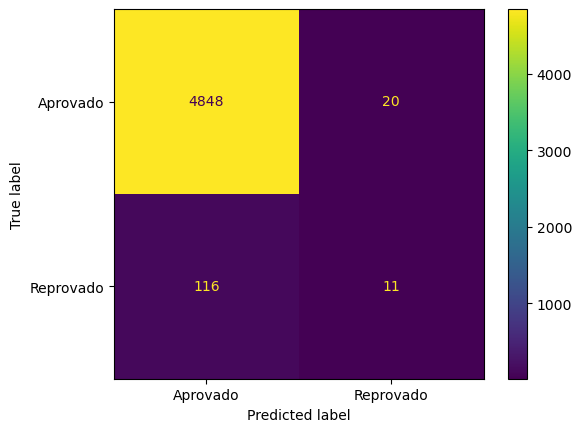

In [89]:
# Criamos a nossa matriz de confusão com as variáveis teste e as preditas:
cm_restrito = confusion_matrix(y_test, y_pred_restrito)

# Colocamos a nossa matriz de confusão com os rotulos personalizados conforme o exercício pede:
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_restrito, 
                                          display_labels=["Aprovado", "Reprovado"])

# Plotamos a nossa matriz de confusão para conferência e cálculo:
MatrizDeConfusao.plot()
plt.show()

In [90]:
# Como os reprovados tem o valor booleano igual a 1, calculamos a proporção de proponentes "maus" na predição de
# nosso modelo:
proporcao_maus = np.mean(y_pred_restrito == 1)*100
print("Proporção de classificados como 'maus':", proporcao_maus)

Proporção de classificados como 'maus': 0.6206206206206206


In [91]:
# Forçamos agora que todos os proponentes sejam classificados como "bom" nos dados target separados para teste em
# uma nova variável:
y_pred_todos_bons = np.full_like(y_test, 0)

In [92]:
# Calculamos a acurácia entre a nova variável e os dados tarfet separados para teste:
acuracia_todos_bons = accuracy_score(y_test, y_pred_todos_bons)
print("Acurácia classificando todos como 'bons':", acuracia_todos_bons)

Acurácia classificando todos como 'bons': 0.9745745745745745


### Como o valor da acurácia é muito alto podemos dizer que os dados estão desbalanceados, ou seja, há muito mais proponentes Aprovados (bom) que Reprovados (mau).